### Inheritence
1. Single
2. Multilevel
3. Hierarchical

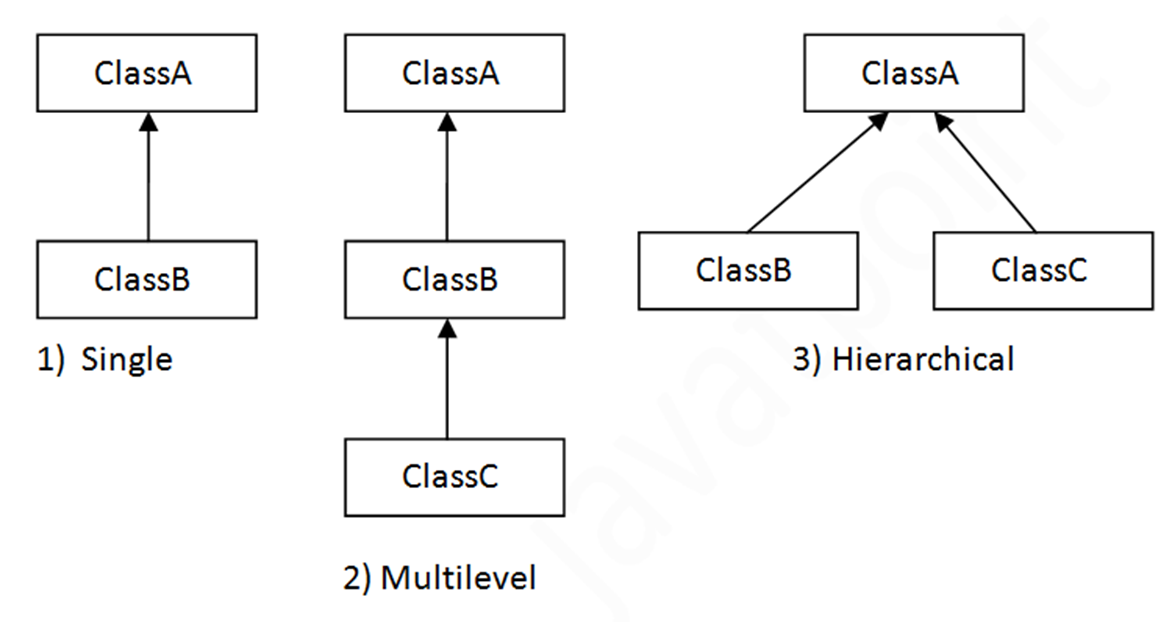

In [6]:
class Person:

   def __init__(self, name: str, age:int):
      self.name = name
      self.age = age

   def introduce(self):
      print(f"My name is {self.name}")
      print(f"I am {self.age} years old.")

In [7]:
class Employee(Person):

   def __init__(self, name:str, age:int, company:str):
      super().__init__(name, age)
      self.company = company

   def work(self):
      print(f"I work for {self.company}")

In [8]:
p1 = Person(name="Rahul", age=28)
type(p1)

__main__.Person

In [9]:
p1.name

'Rahul'

In [10]:
p1.age

28

In [11]:
p1.introduce()

My name is Rahul
I am 28 years old.


In [12]:
e1 = Employee(name="Sarthak", age=35, company="TCS")
type(e1)

__main__.Employee

In [16]:
e1.introduce() # Calling function of super class

My name is Sarthak
I am 35 years old.


In [17]:
e1.company

'TCS'

In [18]:
e1.work()

I work for TCS


In [19]:
e1.introduce()
e1.work()

My name is Sarthak
I am 35 years old.
I work for TCS


### Practical example of Single Inheritence
Pydantic is data validation library in Python

In [20]:
%pip install pydantic email-validator

   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ------------------------------------- -- 1.8/2.0 MB 9.1 MB/s eta 0:00:01
   ---------------------------------------- 2.0/2.0 MB 6.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
from pydantic import BaseModel, Field, EmailStr
from typing import Literal

##### In pydantic we use following shortcut
1. gt = Greater than
2. ge = Greater than Equal to
3. lt = Less than
4. le = Less than Equal to

In [23]:
class Student(BaseModel):
   roll_no: int = Field(description="Student Roll Number", gt=0)
   name: str = Field(description="Name of the Student", min_length=1, max_length=50)
   marks: float = Field(description="Marks in percentage", gt=0, le=100)
   gender: Literal["male", "female"] = Field(description="Gender of the Student")
   email: EmailStr = Field(description="Email of the Student")
   hobbies: list[str] = Field(description="Hobbies of the Student", default_factory=list)

   def get_student_details(self):
      print(f"Roll No: {self.roll_no}")
      print(f"Name: {self.name}")
      print(f"Marks: {self.marks:.2%}")
      print(f"Gender: {self.gender}")
      print(f"email: {self.email}")
      print(f"Hobbies: {self.hobbies}")


In [24]:
s1 = Student(
   roll_no=101,
   name="Rohan",
   marks=78.9,
   gender="male",
   email="rohan@email.com",
   hobbies=["Cricket","Coding"]
)

In [25]:
s1.get_student_details()

Roll No: 101
Name: Rohan
Marks: 7890.00%
Gender: male
email: rohan@email.com
Hobbies: ['Cricket', 'Coding']


In [26]:
s1.name

'Rohan'

In [27]:
s1.email

'rohan@email.com'

In [32]:
s2 = Student(
   roll_no=102,
   name = "John",
   marks=-93.4,
   gender="mmale",
   email="john@test",
   hobbies=[]
)

ValidationError: 3 validation errors for Student
marks
  Input should be greater than 0 [type=greater_than, input_value=-93.4, input_type=float]
    For further information visit https://errors.pydantic.dev/2.10/v/greater_than
gender
  Input should be 'male' or 'female' [type=literal_error, input_value='mmale', input_type=str]
    For further information visit https://errors.pydantic.dev/2.10/v/literal_error
email
  value is not a valid email address: The part after the @-sign is not valid. It should have a period. [type=value_error, input_value='john@test', input_type=str]

In [29]:
s2 # Object s2 is not created 

NameError: name 's2' is not defined

##### To create object of type Student all validations needs to be fullfilled like what we did for object s1

### Multiple Inheritance
Child class inheriting from multiple parent class

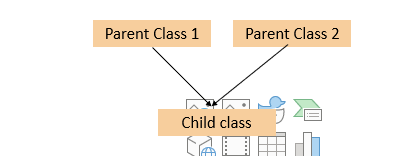

In [33]:
class BaseSalary:
   def __init__(self, base_salary:float):
      self.base_salary = base_salary

   def get_base_salary(self):
      return self.base_salary
   
   

In [35]:
class Bonus:

   def __init__(self, bonus_percentage: float):
      self.bonus_percentage = bonus_percentage

   def calculate_bonus(self, salary):
      return (self.bonus_percentage/100) * salary

In [37]:
class TotalSalary(BaseSalary, Bonus):

   def __init__(self, name:str, base_salary:float, bonus_percentage:float):
      BaseSalary.__init__(self, base_salary)
      Bonus.__init__(self, bonus_percentage)
      self.name = name

   def get_total_salary(self):
      bonus = self.calculate_bonus(self.base_salary)
      return self.base_salary + bonus

In [38]:
t1 = TotalSalary(name="Rohan", base_salary=50_00_000, bonus_percentage=12.5)

In [39]:
t1.get_base_salary()

5000000

In [40]:
t1.base_salary

5000000

In [41]:
t1.bonus_percentage

12.5

In [42]:
t1.get_total_salary()

5625000.0

### Multilevel Inheritance

In [43]:
class Employee2:

   def __init__(self, emp_id, name):
      self.emp_id = emp_id
      self.name = name

   def get_employee_info(self):
      print(f"Employee Id: {self.emp_id}, Name: {self.name}")

In [44]:
class Manager(Employee2):

   def __init__(self, emp_id, name, dept):
      super().__init__(emp_id, name)
      self.dept = dept

   def get_department(self):
      print(f"Department: {self.dept}")

In [45]:
class ProjectManager(Manager):
   def __init__(self, emp_id, name, dept, project):
      super().__init__(emp_id, name, dept)
      self.project = project

   def get_project(self):
      print(f"Project: {self.project}")

In [46]:
e1 = Employee2(101, "Sarthak")

In [47]:
e1.emp_id

101

In [48]:
e1.name

'Sarthak'

In [49]:
e1.get_employee_info()

Employee Id: 101, Name: Sarthak


In [50]:
m1 = Manager(102, "Sameer", "Engg.")

In [51]:
m1.emp_id

102

In [52]:
m1.get_employee_info()

Employee Id: 102, Name: Sameer


In [53]:
m1.get_department()

Department: Engg.


In [54]:
pm1 = ProjectManager(103, "Sujay", "Data Science", "Delloit Finance")

In [55]:
type(pm1)

__main__.ProjectManager

In [56]:
pm1.dept

'Data Science'

In [57]:
pm1.name

'Sujay'

In [58]:
pm1.get_department()

Department: Data Science


In [59]:
pm1.project

'Delloit Finance'

In [60]:
pm1.get_project()

Project: Delloit Finance


In [61]:
pm1.get_employee_info()

Employee Id: 103, Name: Sujay


In [62]:
pm1.get_employee_info()
pm1.get_department()
pm1.get_project()

Employee Id: 103, Name: Sujay
Department: Data Science
Project: Delloit Finance


### Hierarchical Inheritance
One parent class multiple child classes

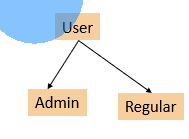

In [63]:
class User:

   def __init__(self, username, email):
      self.username = username
      self.email = email

   def get_user_details(self):
      print(f"Username: {self.username}, Email: {self.email}")

In [64]:
class AdminUser(User):
   def __init__(self, username, email, access):
      super().__init__(username, email)
      self.access = access

   def get_access_info(self):
      print(f"Access Level: {self.access}")

In [65]:
class RegularUser(User):
   def __init__(self, username, email, subscription):
      super().__init__(username, email)
      self.subscription = subscription

   def get_sub_details(self):
      print(f"Subscription Level: {self.subscription}")

In [66]:
u1 = User("Raman","email@email.com")

In [67]:
a1 = AdminUser("admin001", "admin@email.com", access="partial")

In [68]:
a1.access

'partial'

In [69]:
a1.email

'admin@email.com'

In [70]:
a1.get_user_details()
a1.get_access_info()

Username: admin001, Email: admin@email.com
Access Level: partial


In [71]:
r1 = RegularUser("aditim3","aditim3@test.com", "monthly")

In [72]:
r1.get_user_details()
r1.get_sub_details()

Username: aditim3, Email: aditim3@test.com
Subscription Level: monthly


In [76]:
r1.get_access_info() #Since r1 dont have any access over admin user will generate an error

AttributeError: 'RegularUser' object has no attribute 'get_access_info'

In [77]:
a1.get_sub_details() # Since a1 dont have any access over regular user will generate an error

AttributeError: 'AdminUser' object has no attribute 'get_sub_details'